In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
def grayscale(img):
    image = cv2.resize(img, (100,100))
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image  

def get_data(path):
    data = []
    labels = []
    for label in os.listdir(path):
        for file in os.listdir(os.path.join(path, label)):
            img = cv2.imread(os.path.join(path, label, file))
            if img is not None:
                data.append(grayscale(img))
                labels.append(label)
    return np.array(data), np.array(labels)

# PREVIEW

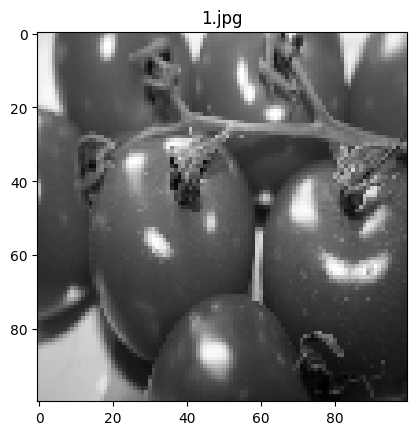

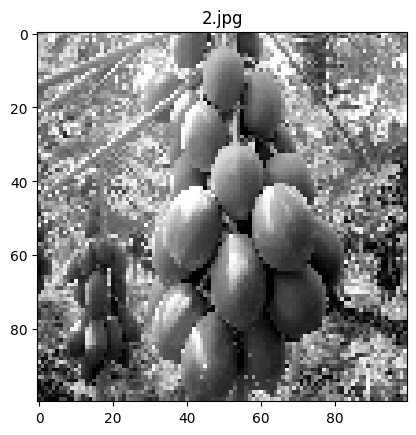

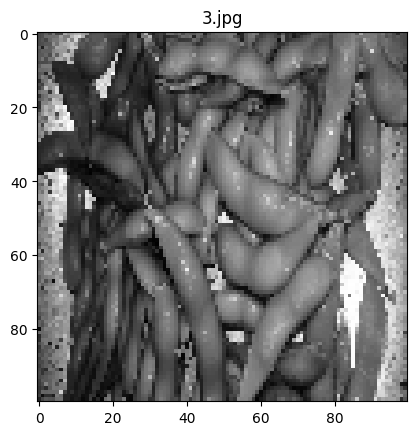

In [17]:
files = os.listdir('test')
for file in files:
    img = cv2.imread(os.path.join('test', file))
    gray = grayscale(img)
    plt.imshow(gray, cmap='gray')
    plt.title(file)
    plt.show()

# **Load Data**

In [18]:
X_train, y_train = get_data("Vegetable_Images/train")
X_val, y_val = get_data("Vegetable_Images/validation")
X_test, y_test = get_data("Vegetable_Images/test")

# Convert into flattened image

In [19]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_val_flattened = X_val.reshape(X_val.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# **Train Data**

In [20]:
clf = svm.SVC()
clf.fit(X_train_flattened, y_train)

SVC()

In [22]:
y_val_pred = clf.predict(X_val_flattened)

In [23]:
y_test_pred = clf.predict(X_test_flattened)

In [31]:
print("Validation Performance\n", confusion_matrix(y_val, y_val_pred))
print("Validation Accuracy: ", '{:.3f}'.format(accuracy_score(y_val, y_val_pred)* 100))

print("Test Performance\n", confusion_matrix(y_test, y_test_pred))
print("Test Accuracy: ", '{:.3f}'.format( accuracy_score(y_test, y_test_pred) * 100))

Validation Performance
 [[135  12   1  10  13   0   0   2   5   3   0   2   7   3   7]
 [  3 164   0   3   0   2   0   4   3  10   0   4   1   4   2]
 [  1   2 171   2   3   3   6   0   1   0   2   0   1   5   3]
 [  8   4   3 145   8   6   1   1   8   5   1   3   3   3   1]
 [  7   2   1   7 141   6   1   4   9   3   1   3   1   2  12]
 [  3   2   1   8   5 128   1   0  16   3   2   2   6   8  15]
 [  1   2   1   4   0   4 165   2   0   2   0   8   5   1   5]
 [  2   1   0   0   7   4   0 178   0   0   1   3   0   1   3]
 [  2   0   1  10   1  14   1   0 150   0   0   1   5  15   0]
 [ 10   4   2   6   7   1   0   2   2 155   2   1   3   2   3]
 [  3   0   2   7   3   2   2   0   1   0 166   4   1   1   8]
 [ 11   1   0   3   7   2   1   2   1   2   0 154   1   3  12]
 [  5   4   4   2   5  12   8   6   4   0   1   0 141   0   8]
 [  0   0   2   1   1  12   1   5  12   1   1   1   0 154   9]
 [ 13   1   0   7   7   3   2   4   5   2   2  12   7  10 125]]
Validation Accuracy:  75.733
T